In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.precision', 3)

# default using seabron style
%matplotlib inline
plt.style.use('seaborn')

## Dataset
Illustrate line plots using stock data using pandas_datareader. Note yahoo finance API is not accurate or reliable, we use it for demonstration ONLY

In [2]:
# seaborn tip data
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips.tip / tips.total_bill * 100
tips.shape
tips.head()

(244, 8)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.945
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054
2,21.01,3.50,Male,No,Sun,Dinner,3,16.659
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978
4,24.59,3.61,Female,No,Sun,Dinner,4,14.681


## Bar charts
Check one dimensional count/value distribution
- default use seaborn
- use matplotlib to set additional settings
- pandas for stacked bar charts
- matplotlib for stacked and floating bar charts

### Seaborn bar chart
- barplot use 'hue' column to plot side by side bar over all categories
- if there are multiple y values for each x+hue, show an err bar, mean +/- std

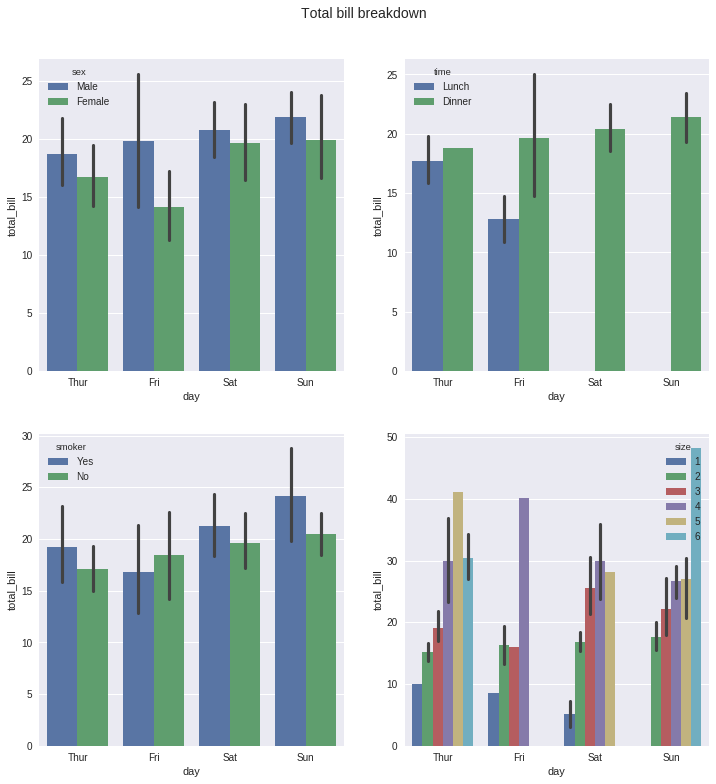

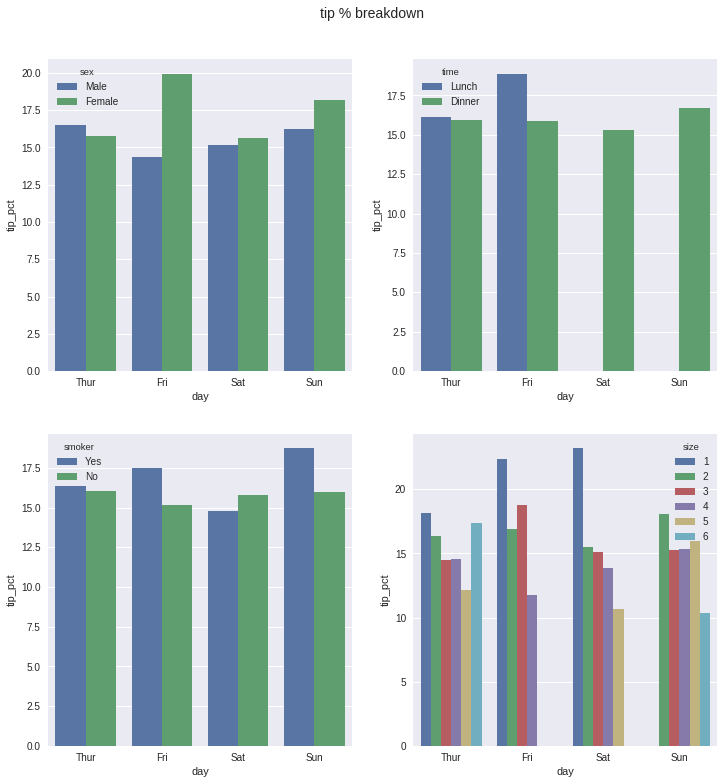

In [3]:
# wanted to find out tip rate vs. time/sex/day
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes_1d = axes.ravel()
hue_cols = ['sex', 'time', 'smoker', 'size']
for ind, hue in enumerate(hue_cols):
    sns.barplot(data=tips, x='day', y='total_bill', hue=hue, ax=axes_1d[ind]);
fig.suptitle('Total bill breakdown', fontsize=14);
fig.subplots_adjust(top=0.92);

# wanted to find out tip rate vs. time/sex/day
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes_1d = axes.ravel()
x_col = 'day'
y_col = 'tip_pct'
hue_cols = ['sex', 'time', 'smoker', 'size']
for ind, hue_col in enumerate(hue_cols):
    temp_df = tips.groupby([x_col, hue_col])[y_col].mean().reset_index()
    _ = sns.barplot(data=temp_df, x=x_col, y=y_col, hue=hue_col, ax=axes_1d[ind]);
fig.suptitle('tip % breakdown', fontsize=14);
fig.subplots_adjust(top=0.92);

## Stacked bar chart
- Seaborn does not support plotting stacked bar chart. Instead pandas bar plot support stacked options
- pandas bar plot:
 - a-axis: index, y-axis: multiple columns.
 - first use pivot_table to convert category (hue) column into multiple columns, then apply stacked option
- matplotlib can manually overlay to create stacked bar chart

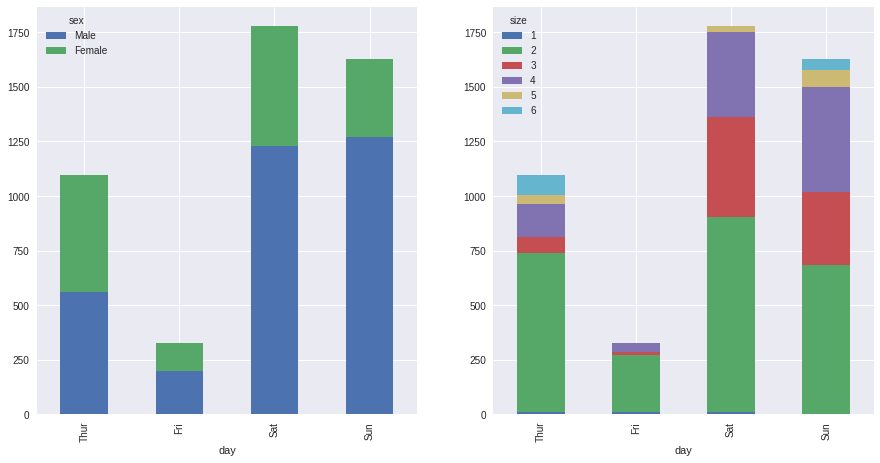

In [4]:
# pandas bar plot stacked option
fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))
tips_sex = tips.groupby(['day', 'sex'])['total_bill'].sum().reset_index().pivot(index='day', columns='sex', values='total_bill')
tips_sex.plot.bar(stacked=True, ax=axes[0]);
tips_size = tips.groupby(['day', 'size'])['total_bill'].sum().reset_index().pivot(index='day', columns='size', values='total_bill')
tips_size.plot.bar(stacked=True, ax=axes[1]);

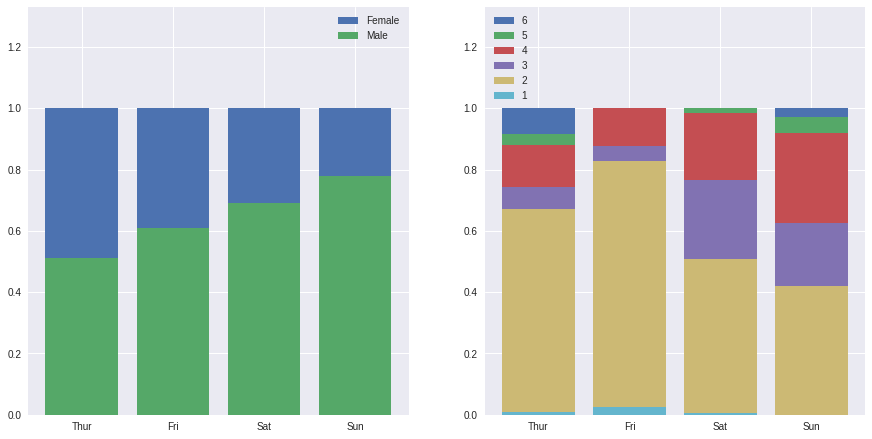

In [5]:
# matplotlib stacked bar chart, a lot more code is needed
# this time try stacked in percentage
# compuate ratio cumsum
tips_sex_ratio = tips_sex / tips_sex.sum(axis=1)[:, np.newaxis]
tips_sex_ratio_cumsum = tips_sex_ratio.cumsum(axis=1)
tips_sex_ratio_cumsum

tips_size_ratio = tips_size / tips_size.sum(axis=1)[:, np.newaxis]
tips_size_ratio_cumsum = tips_size_ratio.cumsum(axis=1)
tips_size_ratio_cumsum

# overlay barchart of cumsum
bar_width = 0.8
fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))
n_rows, n_cols = tips_sex_ratio_cumsum.shape
for col_no in range(n_cols-1, -1, -1):
    axes[0].bar(tips_sex_ratio_cumsum.index, tips_sex_ratio_cumsum.iloc[:, col_no],
            width = bar_width, label=tips_sex_ratio_cumsum.columns[col_no]);
axes[0].set_ylim(0, 1.33);
axes[0].legend();

n_rows, n_cols = tips_size_ratio_cumsum.shape
for col_no in range(n_cols-1, -1, -1):
    axes[1].bar(tips_size_ratio_cumsum.index, tips_size_ratio_cumsum.iloc[:, col_no],
            width = bar_width, label=tips_size_ratio_cumsum.columns[col_no]);
axes[1].set_ylim(0, 1.33);
axes[1].legend();

## Floating bar chart
Barchar that does not start from 0. For example, candle stick chart in stock price history

In [6]:
from pandas_datareader import data, wb
yahoo_reader = data.YahooDailyReader

# read daily stock prices
chip_symbols = ['INTC', 'AMD', 'NVDA']
df = yahoo_reader(chip_symbols, start='2019-01-01', end='2019-12-31').read()
df.shape
df.columns
# get adjusted close price
df_prices = df.drop('Volume', axis=1, level=0)
df_volume = df['Volume']
df_adjclose = df['Adj Close']
df_adjclose.head()

(250, 18)

MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['AMD', 'INTC', 'NVDA']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Attributes', 'Symbols'])

Symbols,AMD,INTC,NVDA
Date,,,
2019-01-02,18.83,45.934,135.690
2019-01-03,17.05,43.407,127.492
2019-01-04,19.00,46.071,135.660
2019-01-07,20.57,46.285,142.842
2019-01-08,20.75,46.578,139.286


,open,high,low,close
Date,,,,
2019-01-31,18.83,25.14,16.94,23.02
2019-02-28,24.51,25.52,22.27,23.21
2019-03-31,23.68,28.11,21.04,25.58
2019-04-30,26.36,29.95,25.83,27.59
2019-05-31,26.81,29.67,26.03,27.57
2019-06-30,27.58,34.30,27.29,31.08
2019-07-31,31.20,34.86,30.10,32.08
2019-08-31,29.86,35.55,27.65,31.60
2019-09-30,30.90,32.05,28.35,28.89


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:2180: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  dx = [convert(x0 + ddx) - x for ddx in dx]


<BarContainer object of 12 artists>

(0, 50.0)

Text(0.5, 1.0, 'AMD candle stick plot')

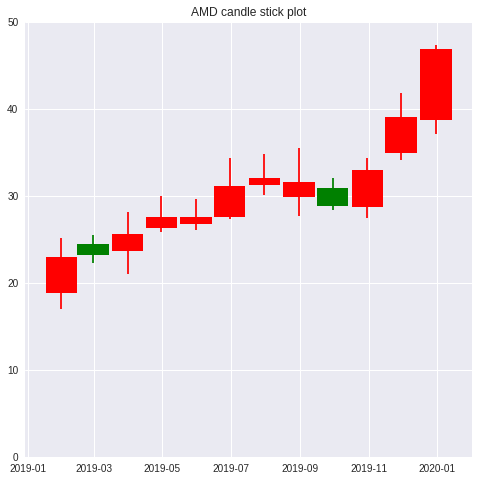

In [7]:
# stock candle stick plot
amd_prices = df_prices.stack(level=0).reset_index(level=1).drop(columns='Attributes')['AMD']
amd_monthly = amd_prices.resample('1M').ohlc()
amd_monthly

# open_close_min--open_close_max bar, 'red' if close>=open else 'green'
# low--high vlines, 'red' if close>=open else 'green'
bar_width = 0.9
amd_up = amd_monthly.close - amd_monthly.open
amd_color = amd_up.apply(lambda x: 'red' if x>=0 else 'green')
amd_low = amd_monthly[['open', 'close']].min(axis=1)
amd_high = amd_monthly[['open', 'close']].max(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.bar(amd_monthly.index, amd_high-amd_low, bottom=amd_low, color=amd_color, width=1);
ax.vlines(amd_monthly.index, amd_monthly.low, amd_monthly.high, color=amd_color)
ax.set_ylim(0, np.ceil(amd_monthly.max().max()/10)*10);
ax.set_title('AMD candle stick plot')

In [8]:
%%script False
yahoo_dividend = data.YahooDivReader
# read dividend payout
divi_symbols = ['REM', 'MORL', 'INDA', 'VNM']
df_dividend = pd.DataFrame()
for symbol in divi_symbols:
    symbol_dividend = yahoo_dividend(symbol, start='2011-01-01', end='2019-12-28').read()
    df_temp = pd.DataFrame(symbol_dividend.value).rename({'value': symbol}, axis=1)
    df_dividend = pd.concat([df_dividend, df_temp], axis=1)
df_dividend.shape
df_dividend.columns
df_dividend.head()
#data.DataReader("DIG",'yahoo', '2019-11-11', '2019-11-19') 
#data.DataReader("600919.SS",'yahoo', '2019-11-11', '2019-11-19')
#data.YahooDivReader('MORL', start='2019-01-11', end='2019-11-19').read()
df_dividend.resample('1Y').sum().plot.bar()

Couldn't find program: 'False'
